<a href="https://colab.research.google.com/github/gustiwdr/uas-artificial-intelligence/blob/main/UAS_Artificial_Intelligence_Gusti_Putu_Wulandari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Gusti Putu Wulandari  
NIM: 20220801124  
Mata Kuliah: Artificial Intelligence  
Ujian Akhir Semester

# **Langkah 1: Preprocessing Data**  
Pada langkah ini, dilakukan pembersihan dan persiapan data sebelum melakukan clustering.

## **1. Load dataset**

In [15]:
from google.colab import files
import pandas as pd

# Upload file ke Google Colab
uploaded = files.upload()

# Baca file yang telah di-upload
df = pd.read_csv("netflix_titles.csv")
df.head()  # Tampilkan 5 baris pertama


Saving netflix_titles.csv to netflix_titles (2).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


*   Dataset berisi informasi film dan TV Show di Netflix.
*   Akan dilakukan pembersihan data agar siap digunakan.

### **1.1. Visualisasi Pie Chart: Distribusi Film vs TV Show**  
Menunjukkan proporsi antara film dan TV show dalam dataset.



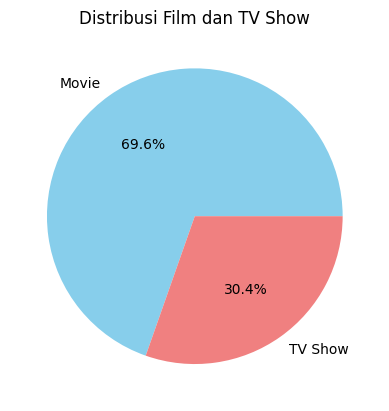

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart tipe konten
df["type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightcoral"])
plt.title("Distribusi Film dan TV Show")
plt.ylabel("")
plt.show()

### **1.2. Histogram: Distribusi Tahun Rilis**  
Menunjukkan jumlah film dan TV show yang dirilis berdasarkan tahun.

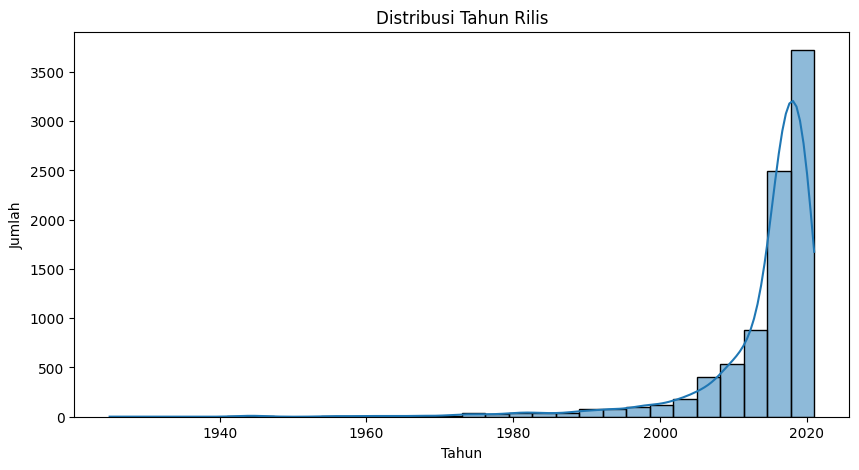

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df["release_year"], bins=30, kde=True)
plt.title("Distribusi Tahun Rilis")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

### **1.3. Scatter Plot: Durasi vs Tahun Rilis**  
Menunjukkan hubungan antara durasi konten dengan tahun rilisnya.

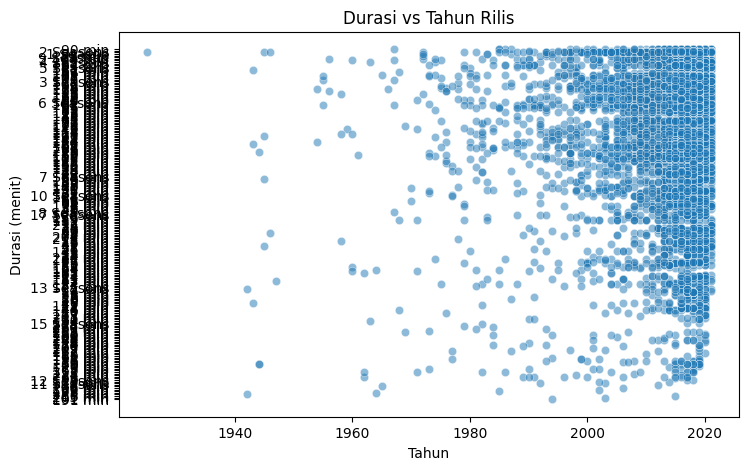

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["release_year"], y=df["duration"], alpha=0.5)
plt.title("Durasi vs Tahun Rilis")
plt.xlabel("Tahun")
plt.ylabel("Durasi (menit)")
plt.show()

## **2. Hapus kolom yang tidak relevan**

In [19]:
df_cleaned = df.drop(columns=["show_id", "director", "cast", "description", "date_added"])




*   Kolom seperti show_id, director, cast, dll. dihapus karena tidak diperlukan untuk clustering.



## **3. Hapus data yang memiliki nilai kosong (missing values)**

In [20]:
df_cleaned = df_cleaned.dropna()



*   Menghapus baris yang memiliki data kosong agar analisis lebih akurat.



## **4. Encoding data kategori ke angka**

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cleaned["type"] = encoder.fit_transform(df_cleaned["type"])
df_cleaned["country"] = encoder.fit_transform(df_cleaned["country"])
df_cleaned["rating"] = encoder.fit_transform(df_cleaned["rating"])
df_cleaned["listed_in"] = encoder.fit_transform(df_cleaned["listed_in"])



*   Kolom type, country, rating, dan listed_in diubah ke angka supaya bisa diproses oleh algoritma clustering.



## **5. Konversi release_year dan duration ke angka**

In [22]:
df_cleaned["release_year"] = df_cleaned["release_year"].astype(int)
df_cleaned["duration"] = df_cleaned["duration"].str.extract("(\d+)").astype(float)
df_cleaned = df_cleaned.dropna()  # Hapus NaN setelah konversi



*   release_year diubah ke integer.
*   duration diekstrak angka saja (misalnya "90 min" jadi 90, "1 Season" jadi 1).



# **Langkah 2: Clustering dengan K-Means**  
Setelah data siap, lanjut ke proses clustering menggunakan K-Means.

## **6. Normalisasi data**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=["title"]))



*   Normalisasi dilakukan agar skala data lebih seimbang dan clustering lebih akurat.



## **7. Jalankan K-Means Clustering**

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned["cluster"] = kmeans.fit_predict(df_scaled)



*   Menggunakan 3 klaster untuk mengelompokkan data.
*   Hasil klaster disimpan di kolom cluster.



## **8. Lihat hasil clustering**

In [25]:
df_cleaned["cluster"].value_counts()

,count
cluster,
2,3895
1,2275
0,1800




*   Menampilkan jumlah data dalam setiap klaster.



### **8.1. PCA Scatter Plot: Visualisasi Klaster**  
Menggunakan PCA untuk mereduksi dimensi dan memplot hasil clustering.

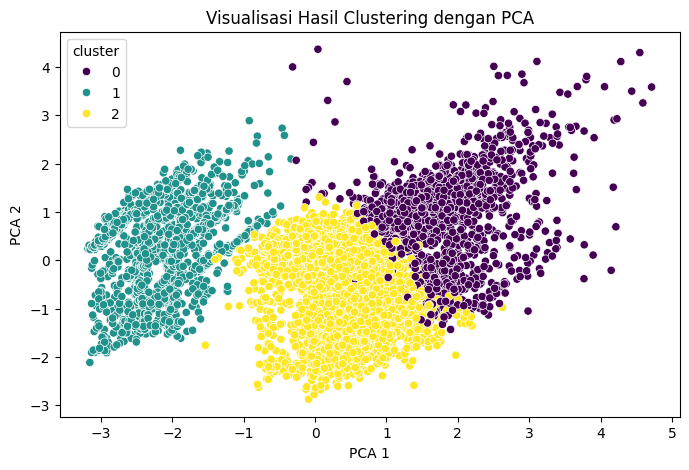

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)  # df_scaled = data yang sudah dinormalisasi

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_cleaned["cluster"], palette="viridis")
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### **8.2. Scatter Plot dengan Centroid (K-Means Saja)**  
Menampilkan titik pusat (centroid) untuk tiap klaster hasil K-Means.

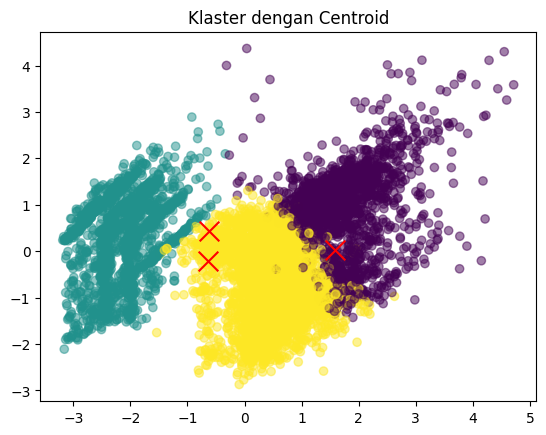

In [27]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned["cluster"], cmap="viridis", alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="x", s=200)
plt.title("Klaster dengan Centroid")
plt.show()

# **Langkah 3: Integrasi dengan Machine Learning**  

Setelah clustering selesai, gunakan hasil klaster sebagai fitur tambahan dalam model Machine Learning.

## **9. Pisahkan fitur dan target untuk model ML**

In [28]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=["title", "cluster"])  # Fitur
y = df_cleaned["cluster"]  # Target klaster

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



*   X adalah fitur yang digunakan untuk prediksi.
*   y adalah label klaster.
*   Data dibagi menjadi 80% training dan 20% testing.





## **10. Latih model machine learning (K-Nearest Neighbors)**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model:", acc)

Akurasi Model: 0.9065244667503137





*   Menggunakan K-Nearest Neighbors (KNN) sebagai model sederhana.
*   Mengukur akurasi model.





# **Langkah 4: Evaluasi dan Pengoptimalan**  
Terakhir, evaluasi performa model.

## **11. Evaluasi akurasi, precision, dan recall**

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       357
           1       0.98      1.00      0.99       475
           2       0.88      0.94      0.91       762

    accuracy                           0.91      1594
   macro avg       0.91      0.88      0.89      1594
weighted avg       0.91      0.91      0.90      1594





*   Menampilkan metrik evaluasi seperti precision, recall, dan F1-score.



### **11.1. Confusion Matrix: Evaluasi Model Klasifikasi**  
Menampilkan matriks kesalahan untuk melihat prediksi yang benar dan salah.

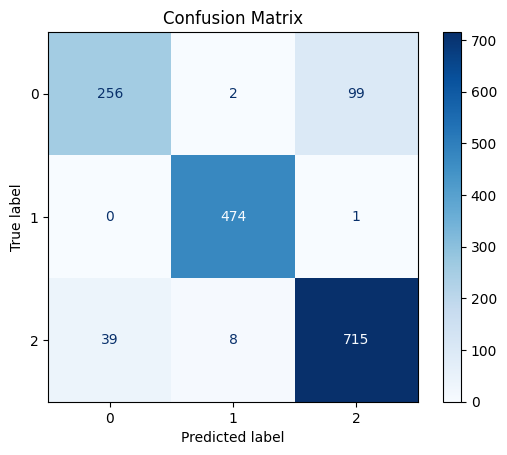

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## **12. Bandingkan dengan model tanpa clustering**

In [32]:
X_no_cluster = df_cleaned.drop(columns=["title", "cluster"])

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_no_cluster, y, test_size=0.2, random_state=42)

model_nc = KNeighborsClassifier(n_neighbors=5)
model_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = model_nc.predict(X_test_nc)
acc_nc = accuracy_score(y_test_nc, y_pred_nc)
print("Akurasi Model Tanpa Clustering:", acc_nc)

Akurasi Model Tanpa Clustering: 0.9065244667503137




*   Melihat apakah clustering membantu meningkatkan akurasi model.



# **Kesimpulan dari perbandingan model:**  

> Meskipun clustering memberikan manfaat dalam analisis eksplorasi, terutama untuk memahami distribusi data berdasarkan fitur seperti release year dan duration, tidak ada peningkatan signifikan pada performa model klasifikasi. Model tanpa clustering juga mampu memprediksi dengan sangat baik. Hal ini mungkin disebabkan oleh kekuatan fitur yang sudah cukup untuk membedakan kategori, sehingga model bisa dengan mudah mempelajari pola dataset dan mencapai akurasi tinggi tanpa bantuan clustering.

